# Luggage Bags Cost Prediction (Regression)

In [1]:
# Import required libs
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts
%matplotlib inline

In [2]:
# Read data-set
coll=pd.read_csv("Data_miniproject.csv")

In [3]:
# Check some information related to the imported data-set
coll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Cost     159 non-null    float64
 1   Weight   159 non-null    float64
 2   Weight1  159 non-null    float64
 3   Length   159 non-null    float64
 4   Height   159 non-null    float64
 5   Width    159 non-null    float64
dtypes: float64(6)
memory usage: 7.6 KB


## Exploring the data-set (EDA)

In [4]:
# Check coloumn set
list(coll.columns)

['Cost', 'Weight', 'Weight1', 'Length', 'Height', 'Width']

In [5]:
# Check data-types
coll.dtypes

Cost       float64
Weight     float64
Weight1    float64
Length     float64
Height     float64
Width      float64
dtype: object

In [6]:
# Check some samples of the data
coll.head(3)

,Cost,Weight,Weight1,Length,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961


In [7]:
# Add another feature 'Volume' which makes more sense as even Length, Width and Height are dimensions of Volume
# Volume will also account for the synergy and interaction between the other 3 dimensions
coll['Volume'] = coll.Length * coll.Width * coll.Height
coll.head(3)

,Cost,Weight,Weight1,Length,Height,Width,Volume
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1389.312000
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1676.497306
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1807.761723


In [8]:
# Check some information about data
print("""DataFrame Dimensions = {0}
Dataframe Shape = {1}""".format(coll.ndim, coll.shape))

DataFrame Dimensions = 2
Dataframe Shape = (159, 7)


In [9]:
# Check some relevant stats about the data
coll.describe(percentiles=[.05,.25,.5,.75,.99])
# The data looks neatly distributed

,Cost,Weight,Weight1,Length,Height,Width,Volume
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486,1704.522763
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804,1526.852632
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600,19.672922
5%,9.800000,11.300000,11.800000,13.100000,2.203560,1.283140,36.110538
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650,491.244166
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500,1021.622048
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500,2894.667622
99%,1571.000000,56.000000,60.000000,64.000000,18.685296,7.679758,5598.071561
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000,5771.403320


In [10]:
# Minimum cost appears 0 for a data row, check this
coll[coll.Cost==0]

,Cost,Weight,Weight1,Length,Height,Width,Volume
40,0.0,19.0,20.5,22.8,6.4752,3.3516,494.811991


In [11]:
# The observation recording appears incorrect, check the range
coll[(coll.Volume>=490) & (coll.Volume<=500)]

,Cost,Weight,Weight1,Length,Height,Width,Volume
39,120.0,18.6,20.0,22.2,6.2160,3.5742,493.222444
40,0.0,19.0,20.5,22.8,6.4752,3.3516,494.811991


In [12]:
# Range appears in 25% and replacing the Cost at 25%
coll.Cost[coll.Cost==0] = 120

In [13]:
# Check duplicates, no duplicates if shape = (0, M)
coll[coll.duplicated()].shape

(0, 7)

In [14]:
# Check null values
coll.isnull().sum()

Cost       0
Weight     0
Weight1    0
Length     0
Height     0
Width      0
Volume     0
dtype: int64

## Plot data and stats

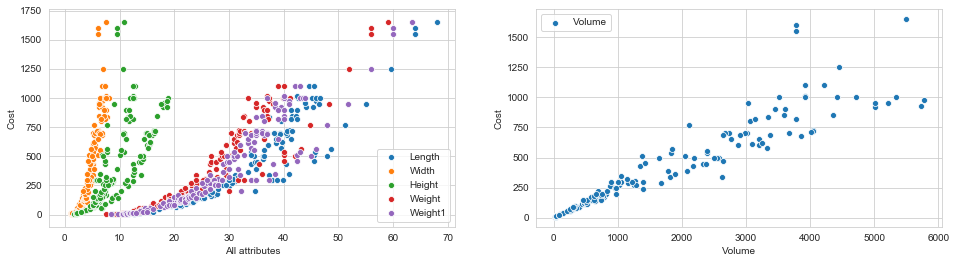

In [15]:
# Check how the data is scattered w.r.t Cost
plt.figure(figsize=[16,4])
sb.set_style("whitegrid")
plt.subplot(121)
sb.scatterplot(y=coll.Cost,x=coll.Length, label='Length')
sb.scatterplot(y=coll.Cost,x=coll.Width, label='Width')
sb.scatterplot(y=coll.Cost,x=coll.Height, label='Height')
sb.scatterplot(y=coll.Cost,x=coll.Weight, label='Weight')
sb.scatterplot(y=coll.Cost,x=coll.Weight1, label='Weight1')
plt.xlabel('All attributes')
plt.subplot(122)
sb.scatterplot(y=coll.Cost,x=coll.Volume, label='Volume')
plt.show()

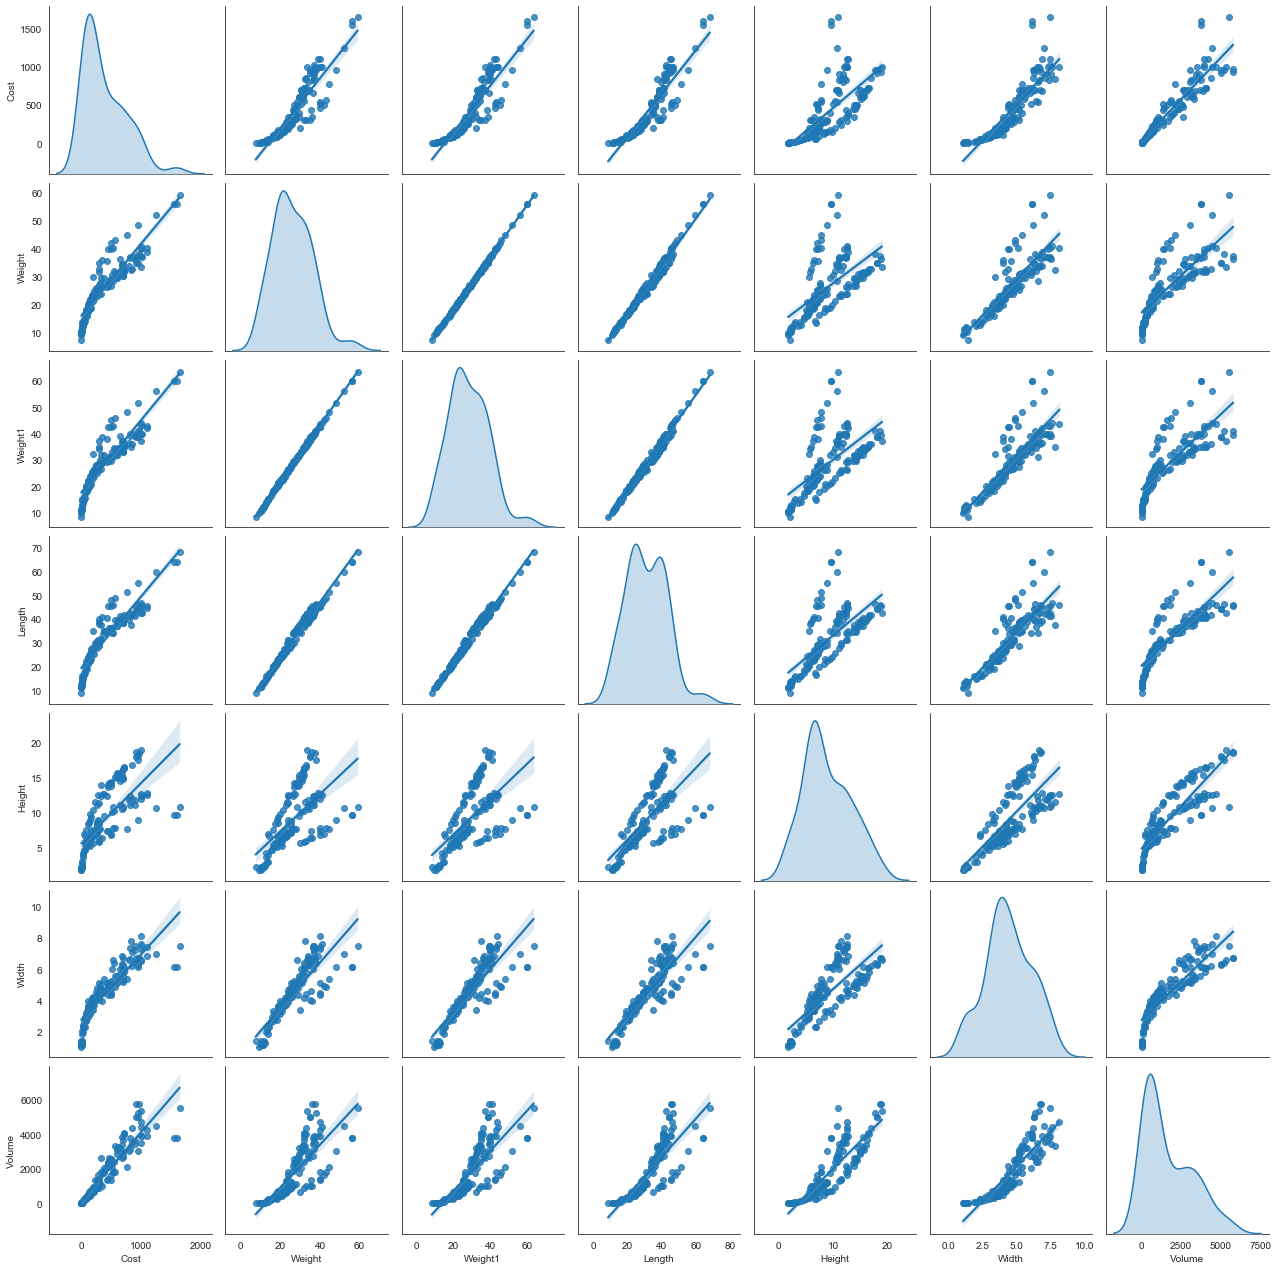

In [16]:
# Pair plots of data
sb.set_style("white")
sb.pairplot(coll, diag_kind='kde', kind='reg')
plt.show()

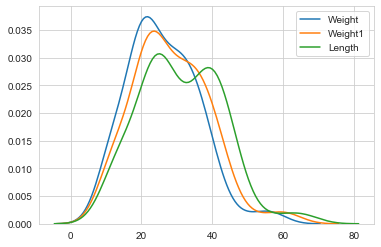

In [17]:
# We can see that Weight, Weight1 and Length are heavliy linearly correlated
sb.set_style('whitegrid')
sb.kdeplot(coll.Weight)
sb.kdeplot(coll.Weight1)
sb.kdeplot(coll.Length)
plt.show()

In [18]:
# Check the correlation matrix
corr = coll.iloc[:,1:].corr()
corr

,Weight,Weight1,Length,Height,Width,Volume
Weight,1.000000,0.999517,0.992031,0.625378,0.867050,0.809085
Weight1,0.999517,1.000000,0.994103,0.640441,0.873547,0.817725
Length,0.992031,0.994103,1.000000,0.703409,0.878520,0.848250
Height,0.625378,0.640441,0.703409,1.000000,0.792881,0.882018
Width,0.867050,0.873547,0.878520,0.792881,1.000000,0.890896
Volume,0.809085,0.817725,0.848250,0.882018,0.890896,1.000000


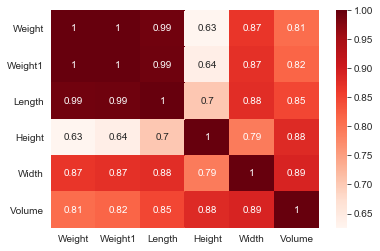

In [19]:
sb.heatmap(corr, cmap='Reds', annot=True)
plt.show()

In [20]:
# As depecited using various methods, Weight, Weight1 and Length are very similar
# Will drop Weight and Weight1 later after some more stat analysis

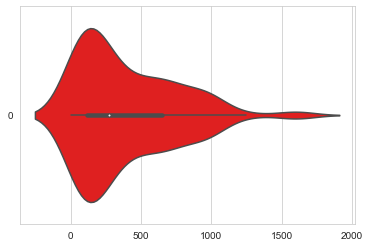

In [21]:
# Check outliers in Cost
sb.violinplot(data=coll.Cost, orient='h', color='r')
plt.show()

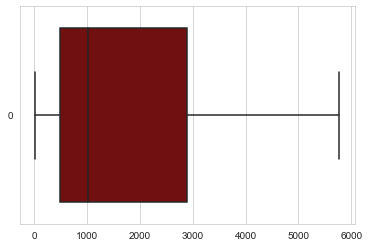

In [22]:
# Check outliers in Volume
sb.boxplot(data=coll.Volume, orient='h', color='maroon')
plt.show()

In [23]:
# Check the data for outliers using Z-Score
coll[sts.zscore(coll.Cost)>=3]

,Cost,Weight,Weight1,Length,Height,Width,Volume
142,1600.0,56.0,60.0,64.0,9.600,6.144,3774.87360
143,1550.0,56.0,60.0,64.0,9.600,6.144,3774.87360
144,1650.0,59.0,63.4,68.0,10.812,7.480,5499.41568


In [24]:
# Outliers can be removed from the dataset
# Will drop this later so that the graphs display outliers

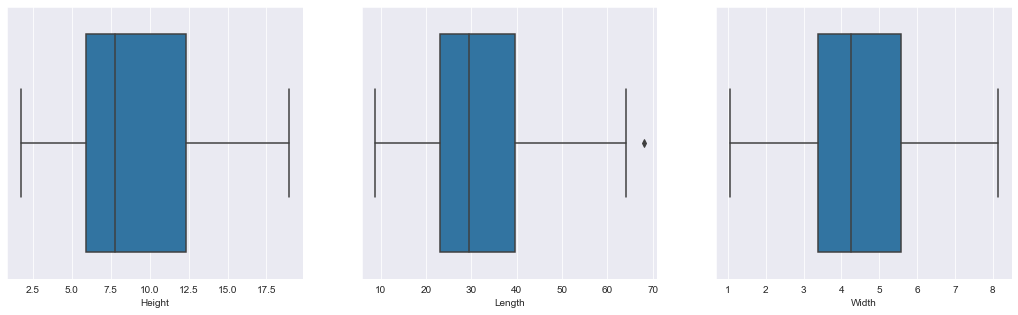

In [25]:
# Check distribution of features
sb.set_style('darkgrid')
plt.figure(figsize=[18,5])
plt.subplot(1,3,1)
sb.boxplot(coll.Height)
plt.subplot(1,3,2)
sb.boxplot(coll.Length)
plt.subplot(1,3,3)
sb.boxplot(coll.Width)
plt.show()

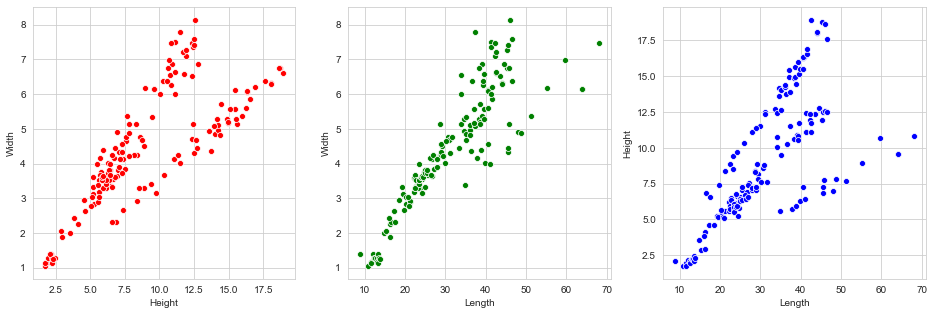

In [26]:
# Check high-leverage points using multi-variate plots
sb.set_style('whitegrid')
plt.figure(figsize=[16,5])
plt.subplot(1,3,1)
sb.scatterplot(x=coll.Height, y=coll.Width, color='r')
plt.subplot(1,3,2)
sb.scatterplot(x=coll.Length, y=coll.Width, color='g')
plt.subplot(1,3,3)
sb.scatterplot(x=coll.Length, y=coll.Height, color='b')
plt.show()

In [27]:
# We can see that Length>50, Width>8 and Height>17.5 corespond to high leverage, but will keep them for now
# coll = coll.drop(index=coll[(coll.Height >= 17.5) | (coll.Width >= 8) | (coll.Length >= 50)].index)

In [28]:
# Function to calculate Variance Inflation Factor for multicollinearity
import statsmodels.api as sm
def calcVIF(X, y):
    vif_df = pd.DataFrame(columns = ['Feature', 'VIF Score'])
    x_vars = X.drop([y], axis=1)
    xvar_names = x_vars.columns
    for i in range(0, xvar_names.shape[0]):
        y = x_vars[xvar_names[i]] 
        x = x_vars[xvar_names.drop(xvar_names[i])]
        rsq = sm.OLS(y,x).fit().rsquared  
        vif = round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by='VIF Score', axis=0)

# Calculate VIF scores
calcVIF(X=coll.drop([], axis=1), y='Cost')
# As seen, all variables except volume are highly collinear and need to be dropped for best model
# Models will be calculated and compared between multi-features (Length, Width, Height) and also a single Volume feature

,Feature,VIF Score
5,Volume,7.85
3,Height,92.69
4,Width,93.22
2,Length,3517.94
0,Weight,13463.22
1,Weight1,16823.73


In [29]:
# Reset the index to make it continuous and avoid future indexing errors
coll.index=[n for n in range(coll.shape[0])]
coll.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            149, 150, 151, 152, 153, 154, 155, 156, 157, 158],
           dtype='int64', length=159)

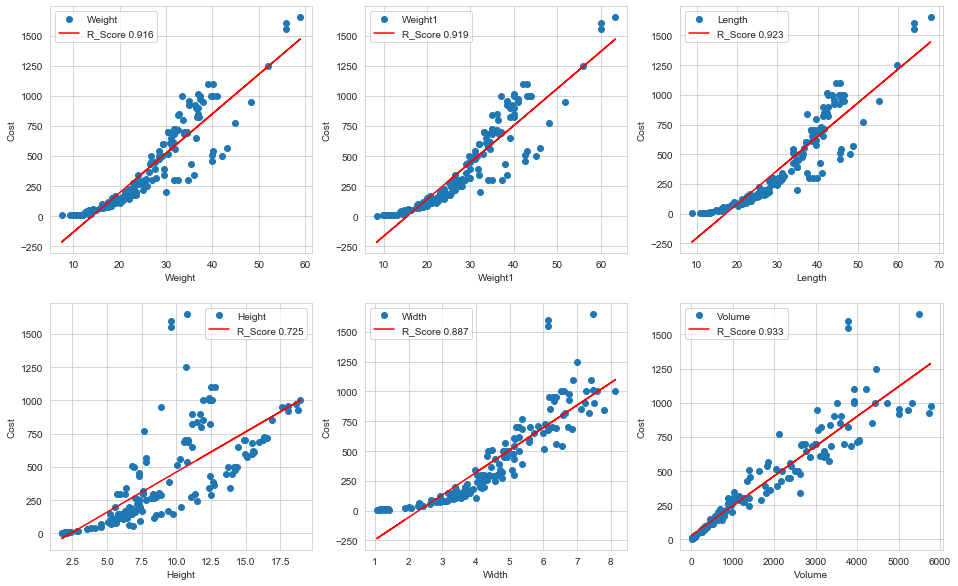

In [30]:
# Run univariate regression on individual predictors and check r and p scores
x,x1,x2,x3,x4,x5=coll.Volume,coll.Weight,coll.Weight1,coll.Length,coll.Height,coll.Width
y=coll['Cost']
plt.figure(figsize=[16,10])

# Regression for Weight
slope, intercept, r_value, p_value, std_err = sts.linregress(x1,y)
plt.subplot(2,3,1)
plt.xlabel('Weight')
plt.ylabel('Cost')
plt.plot(x1, y, 'o', label='Weight')
plt.plot(x1, intercept + slope*x1, 'r', label='R_Score {:.3f}'.format(r_value))
plt.legend()

# Regresion for Weight1
slope, intercept, r_value, p_value, std_err = sts.linregress(x2,y)
plt.subplot(2,3,2)
plt.xlabel('Weight1')
plt.ylabel('Cost')
plt.plot(x2, y, 'o', label='Weight1')
plt.plot(x2, intercept + slope*x2, 'r', label='R_Score {:.3f}'.format(r_value))
plt.legend()

# Regresion for Length
slope, intercept, r_value, p_value, std_err = sts.linregress(x3,y)
plt.subplot(2,3,3)
plt.xlabel('Length')
plt.ylabel('Cost')
plt.plot(x3, y, 'o', label='Length')
plt.plot(x3, intercept + slope*x3, 'r', label='R_Score {:.3f}'.format(r_value))
plt.legend()

# Regresion for Height
slope, intercept, r_value, p_value, std_err = sts.linregress(x4,y)
plt.subplot(2,3,4)
plt.xlabel('Height')
plt.ylabel('Cost')
plt.plot(x4, y, 'o', label='Height')
plt.plot(x4, intercept + slope*x4, 'r', label='R_Score {:.3f}'.format(r_value))
plt.legend()

# Regresion for Width
slope, intercept, r_value, p_value, std_err = sts.linregress(x5,y)
plt.subplot(2,3,5)
plt.xlabel('Width')
plt.ylabel('Cost')
plt.plot(x5, y, 'o', label='Width')
plt.plot(x5, intercept + slope*x5, 'r', label='R_Score {:.3f}'.format(r_value))
plt.legend()

# Regresion for Volume
slope, intercept, r_value, p_value, std_err = sts.linregress(x,y)
plt.subplot(2,3,6)
plt.xlabel('Volume')
plt.ylabel('Cost')
plt.plot(x, y, 'o', label='Volume')
plt.plot(x, intercept + slope*x, 'r', label='R_Score {:.3f}'.format(r_value))
plt.legend()
plt.show()

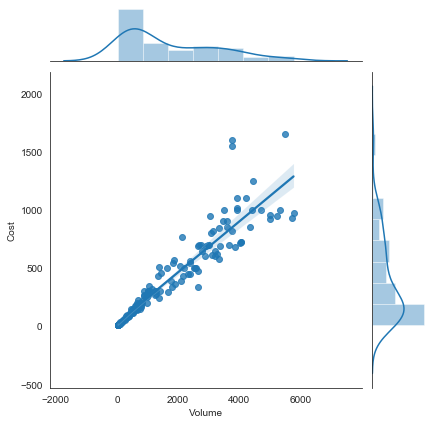

In [31]:
# As seen from the regression lines, Length has a marginally better r_value than Weight/Weight1
# Dimensions (LxWxH) individually are highly correlated and Volume gives better interpretability and regression output
# This is seen from the best r_value that the Volume graph has in the above regression, plotting again using seaborn
# Volume will also account for the very sparse and non-linear relationship of Height vs. Cost
sb.set_style("white")
sb.jointplot(x=coll.Volume, y=coll.Cost, kind='reg')
plt.show()
# Notice how the outliers show up on the top which relate to the 3 Cost rows with high Z-Score(>3)

In [32]:
# It can also be shown through feature selection algorithms that Volume is the single best choice of feature to be used
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import feature_selection

X_sel = coll.loc[:,['Weight','Weight1','Length','Height','Width','Volume']]
y_sel = coll['Cost']
X_new = SelectKBest(feature_selection.mutual_info_regression, k=2).fit_transform(X_sel,y_sel)

print('Best feature is Volume' if ((coll.Volume == X_new[:,1].flatten()).sum() == coll.Volume.shape[0]) else
      'Best feature is not Volume')
print('Second best is Length and the reason for dropping Weight/Weight1 for multi-variate regression'
      if ((coll.Length == X_new[:,0].flatten()).sum() == coll.Length.shape[0]) else 'Second best is not Length')

Best feature is Volume
Second best is Length and the reason for dropping Weight/Weight1 for multi-variate regression


In [33]:
# Dropping Weight/Weight1 and keeping Length
coll.drop(['Weight','Weight1'], axis=1, inplace=True)

In [34]:
# Keep a copy for SKLearn
coll_orig = coll.copy()

In [35]:
# Getting the data ready for modelling with gradient descent
# Drop Outliers
coll = coll.drop(index=coll[sts.zscore(coll.Cost)>=3].index)

# Normalize features to have gradient descent work properly
# Perform directly as all features are continuous
X_norm = ['Length','Height','Width','Volume']
coll[X_norm] = (coll[X_norm] - coll[X_norm].mean())/coll[X_norm].std()
coll.shape, coll.tail()

((156, 5),
      Cost    Length    Height     Width    Volume
 154  12.2 -1.605477 -1.586543 -1.783364 -1.082301
 155  13.4 -1.596127 -1.508011 -1.857877 -1.080563
 156  12.2 -1.568078 -1.543392 -1.865771 -1.082017
 157  19.7 -1.437180 -1.405613 -1.380538 -1.047960
 158  19.9 -1.343681 -1.391877 -1.492966 -1.048632)

### Modelling with Batch Gradient Descent

In [36]:
# Choose features and generate data for modelling
# Model-1 henceforth will be with 3 features - Length, Width and Height
# Model-2 henceforth will be with 1 feature - Volume

def getData():
    
    X = coll.values[:,1:4]
    y = coll.values[:,0]
    X_vol = coll.values[:,4:]

    # Reshape and sample the values
    X = np.hstack((np.ones(coll.shape[0]).reshape(-1,1), X))
    X_vol = np.hstack((np.ones(coll.shape[0]).reshape(-1,1), X_vol))
    y = y.reshape(-1,1)
    theta = np.ones(X.shape[1]).reshape(-1,1)
    theta_vol = np.ones(X_vol.shape[1]).reshape(-1,1)
    
    # Seed the PRNG, shuffle the data and split the data to test/train sets
    sample_size = y.size
    split_ratio = 0.8
    train_samples = int(split_ratio * sample_size)

    np.random.seed(365)
    shuffledIndex = np.random.permutation(sample_size)
    X_train, y_train = X[shuffledIndex[range(train_samples)]], y[shuffledIndex[range(train_samples)]]
    X_test, y_test = X[shuffledIndex[train_samples:]], y[shuffledIndex[train_samples:]]

    np.random.seed(125)
    shuffledIndex = np.random.permutation(sample_size)
    X_vol_train, y_vol_train = X_vol[shuffledIndex[range(train_samples)]], y[shuffledIndex[range(train_samples)]]
    X_vol_test, y_vol_test = X_vol[shuffledIndex[train_samples:]], y[shuffledIndex[train_samples:]]
    
    return X, X_vol, y, X_train, y_train, X_test, y_test, X_vol_train, y_vol_train, X_vol_test, y_vol_test, theta, theta_vol

In [37]:
# Gather data
X, X_vol, y, X_train, y_train, X_test, y_test, X_vol_train, y_vol_train, X_vol_test, y_vol_test, theta, theta_vol = getData()

In [38]:
# Check the best value of theta using analytical method
# Use this to compare the gradient descent values of theta
print('Theta for Model-1')
print(np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y).flatten())
print('Theta for Model-2')
print(np.linalg.pinv(X_vol.T.dot(X_vol)).dot(X_vol.T).dot(y).flatten())

Theta for Model-1
[375.98653846 120.11769251  42.87184593 152.53309023]
Theta for Model-2
[375.98653846 305.20152414]


In [39]:
# Error function to be minimized
def computeCost(X,y,theta):
    summation = (X.dot(theta) - y) ** 2
    cost = np.sum(summation)/(2*y.size)
    return cost

# Sample error function cost
# computeCost(X,y,theta)

In [40]:
# Gradient descent algorithm
def gradientDescent(X,y,theta,alpha=0.1,iters=500):
    samples = y.size
    costHist = []
    for i in range(iters):
        delta = X.T.dot(X.dot(theta) - y)/samples
        theta -= alpha * delta
        costHist.append(computeCost(X,y,theta))
    return theta, costHist

In [41]:
# Calculate GD
theta, costHist = gradientDescent(X_train,y_train,theta,alpha=0.5,iters=100)
print('Theta for Model-1')
print(theta.flatten())

theta_vol, costHist_vol = gradientDescent(X_vol_train,y_vol_train,theta_vol,alpha=0.5,iters=100)
print('Theta for Model-2')
print(theta_vol.flatten())

# Predict the values
y_pred = X_test.dot(theta)
y_vol_pred = X_vol_test.dot(theta_vol)

Theta for Model-1
[378.10523371 108.70278802  44.39735541 152.92543887]
Theta for Model-2
[377.27908179 301.67610525]


In [42]:
# Calulate and print R_value, R2, MSE, RMSE for the test set
RSS = np.sum(np.square(y_pred - y_test))
TSS = np.sum(np.square(y_test - y_test.mean()))
R2 = 1 - RSS/TSS
R_value = np.sqrt(R2)
MSE = RSS/y_test.size
RMSE = np.sqrt(MSE)

print('Model-1 Estimates')
print('[R_value = {:.3f}, R2 = {:.3f}, MSE = {:.3f}, RMSE = {:.3f}]'.format(R_value, R2, MSE, RMSE))

RSS_vol = np.sum(np.square(y_vol_pred - y_vol_test))
TSS_vol = np.sum(np.square(y_vol_test - y_vol_test.mean()))
R2_vol = 1 - RSS_vol/TSS_vol
R_value_vol = np.sqrt(R2_vol)
MSE_vol = RSS_vol/y_vol_test.size
RMSE_vol = np.sqrt(MSE_vol)

print('Model-2 Estimates')
print('[R_value = {:.3f}, R2 = {:.3f}, MSE = {:.3f}, RMSE = {:.3f}]'.format(R_value_vol, R2_vol, MSE_vol, RMSE_vol))

Model-1 Estimates
[R_value = 0.965, R2 = 0.932, MSE = 7100.189, RMSE = 84.263]
Model-2 Estimates
[R_value = 0.987, R2 = 0.974, MSE = 2286.665, RMSE = 47.819]


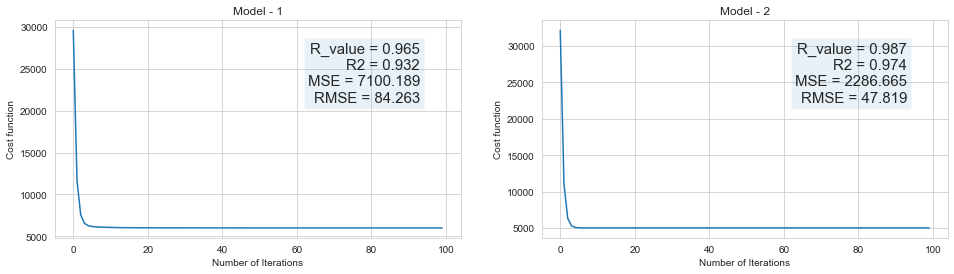

In [43]:
# Check that the gradient descent works
# Plot Cost function vs. number of iterations
plt.figure(figsize=(16,4))
sb.set_style("whitegrid")

ax = plt.subplot(1,2,1)
plt.plot(np.arange(len(costHist)),costHist)
plt.title('Model - 1')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.text(0.9, 0.9, 'R_value = {:.3f}\nR2 = {:.3f}\nMSE = {:.3f}\nRMSE = {:.3f}'.format(R_value, R2, MSE, RMSE),
         fontsize=15, horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.1), transform=ax.transAxes)

ax = plt.subplot(1,2,2)
plt.plot(np.arange(len(costHist_vol)),costHist_vol)
plt.title('Model - 2')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.text(0.9, 0.9, 'R_value = {:.3f}\nR2 = {:.3f}\nMSE = {:.3f}\nRMSE = {:.3f}'.format(R_value_vol, R2_vol, MSE_vol, RMSE_vol),
         fontsize=15, horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.1), transform=ax.transAxes)
plt.show()

### Modelling with Stochastic Gradient Descent

In [44]:
# Stochastic gradient descent algorithm
def stochasticGD(X,y,theta,alpha=0.1,iters=10):
    samples = y.size
    costHist = []
    for i in range(iters):
        cost = 0
        # Shuffle the data
        shuffledIndex = np.random.permutation(samples)
        # Gradient per data row
        for j in shuffledIndex:
            xj,yj = X[j].reshape(1,-1),y[j].reshape(-1,1)
            delta = xj.T.dot(xj.dot(theta) - yj)
            theta -= alpha * delta
            cost += computeCost(xj,yj,theta)
        costHist.append(cost)
    return theta, costHist

In [45]:
# Gather data again in case it changed
X, X_vol, y, X_train, y_train, X_test, y_test, X_vol_train, y_vol_train, X_vol_test, y_vol_test, theta, theta_vol = getData()

# Calculate SGD
theta, costHist = stochasticGD(X_train,y_train,theta,alpha=0.005,iters=10)
print('Theta for Model-1')
print(theta.flatten())

theta_vol, costHist_vol = stochasticGD(X_vol_train,y_vol_train,theta_vol,alpha=0.005,iters=10)
print('Theta for Model-2')
print(theta_vol.flatten())

# Predict the values
y_pred = X_test.dot(theta)
y_vol_pred = X_vol_test.dot(theta_vol)

Theta for Model-1
[376.00627945 116.45830071  60.55439263 133.96988619]
Theta for Model-2
[375.99324809 299.84709098]


In [46]:
# Calulate and print R_value, R2, MSE, RMSE for the test set
RSS = np.sum(np.square(y_pred - y_test))
TSS = np.sum(np.square(y_test - y_test.mean()))
R2 = 1 - RSS/TSS
R_value = np.sqrt(R2)
MSE = RSS/y_test.size
RMSE = np.sqrt(MSE)

print('Model-1 Estimates')
print('[R_value = {:.3f}, R2 = {:.3f}, MSE = {:.3f}, RMSE = {:.3f}]'.format(R_value, R2, MSE, RMSE))

RSS_vol = np.sum(np.square(y_vol_pred - y_vol_test))
TSS_vol = np.sum(np.square(y_vol_test - y_vol_test.mean()))
R2_vol = 1 - RSS_vol/TSS_vol
R_value_vol = np.sqrt(R2_vol)
MSE_vol = RSS_vol/y_vol_test.size
RMSE_vol = np.sqrt(MSE_vol)

print('Model-2 Estimates')
print('[R_value = {:.3f}, R2 = {:.3f}, MSE = {:.3f}, RMSE = {:.3f}]'.format(R_value_vol, R2_vol, MSE_vol, RMSE_vol))

Model-1 Estimates
[R_value = 0.966, R2 = 0.933, MSE = 6969.757, RMSE = 83.485]
Model-2 Estimates
[R_value = 0.987, R2 = 0.973, MSE = 2336.579, RMSE = 48.338]


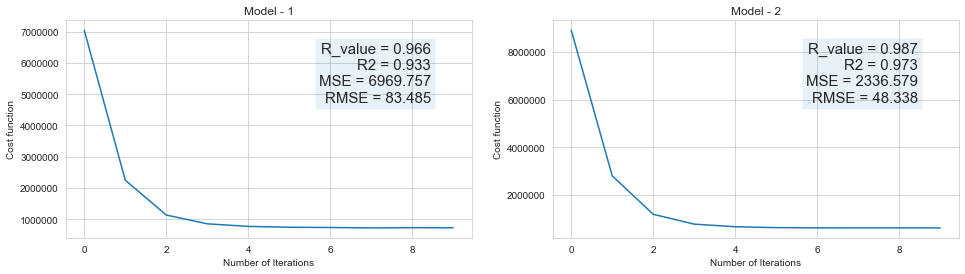

In [47]:
# Check that the stochastic gradient descent works
# Plot Cost function vs. number of iterations
plt.figure(figsize=(16,4))

ax = plt.subplot(1,2,1)
plt.plot(np.arange(len(costHist)),costHist)
plt.title('Model - 1')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.text(0.9, 0.9, 'R_value = {:.3f}\nR2 = {:.3f}\nMSE = {:.3f}\nRMSE = {:.3f}'.format(R_value, R2, MSE, RMSE),
         fontsize=15, horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.1), transform=ax.transAxes)

ax = plt.subplot(1,2,2)
plt.plot(np.arange(len(costHist_vol)),costHist_vol)
plt.title('Model - 2')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.text(0.9, 0.9, 'R_value = {:.3f}\nR2 = {:.3f}\nMSE = {:.3f}\nRMSE = {:.3f}'.format(R_value_vol, R2_vol, MSE_vol, RMSE_vol),
         fontsize=15, horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.1), transform=ax.transAxes)
plt.show()

### Modelling with Mini-Batch Gradient Descent

In [48]:
# Mini-batch gradient descent algorithm
def miniGradientDescent(X,y,theta,batch_size,alpha=0.01,iters=1):
    samples = y.size
    costHist = []
    batch = int(samples/batch_size)
    batch_size_orig = batch_size
    
    # Run multiple iterations of mini-batch if gradient does not converge
    for i in range(iters):
        
        # Shuffle the batch and reset batch_size
        randomIndex = np.random.permutation(samples)
        X,y = X[randomIndex], y[randomIndex]
        batch_size = batch_size_orig
        
        # For-each batch
        for j in range(batch):
            cost = 0
            index = j*batch_size
            # Use all samples
            batch_size = (batch_size + samples%batch_size) if (batch - j == 1) else batch_size
            
            # Calculate the gradient for the batch
            for k in range(batch_size):
                X1,y1 = X[index:batch_size * (j+1),:], y[index:batch_size * (j+1)]
                delta = X1.T.dot(X1.dot(theta) - y1)/batch_size
                theta -= alpha * delta
                cost += computeCost(X1,y1,theta)
            costHist.append(cost)
    return theta, costHist

In [49]:
# Gather data again in case it changed
X, X_vol, y, X_train, y_train, X_test, y_test, X_vol_train, y_vol_train, X_vol_test, y_vol_test, theta, theta_vol = getData()

# Calculate MBGD
theta, costHist = miniGradientDescent(X_train,y_train,theta,batch_size=25,alpha=0.005,iters=10)
print('Theta for Model-1')
print(theta.flatten())

theta_vol, costHist_vol = miniGradientDescent(X_vol_train,y_vol_train,theta_vol,batch_size=25,alpha=0.005,iters=10)
print('Theta for Model-2')
print(theta_vol.flatten())

# Predict the values
y_pred = X_test.dot(theta)
y_vol_pred = X_vol_test.dot(theta_vol)

Theta for Model-1
[376.39712941 115.55263971  60.5935736  133.17481724]
Theta for Model-2
[377.45906128 302.02542953]


In [50]:
# Calulate and print R_value, R2, MSE, RMSE for the test set
RSS = np.sum(np.square(y_pred - y_test))
TSS = np.sum(np.square(y_test - y_test.mean()))
R2 = 1 - RSS/TSS
R_value = np.sqrt(R2)
MSE = RSS/y_test.size
RMSE = np.sqrt(MSE)

print('Model-1 Estimates')
print('[R_value = {:.3f}, R2 = {:.3f}, MSE = {:.3f}, RMSE = {:.3f}]'.format(R_value, R2, MSE, RMSE))

RSS_vol = np.sum(np.square(y_vol_pred - y_vol_test))
TSS_vol = np.sum(np.square(y_vol_test - y_vol_test.mean()))
R2_vol = 1 - RSS_vol/TSS_vol
R_value_vol = np.sqrt(R2_vol)
MSE_vol = RSS_vol/y_vol_test.size
RMSE_vol = np.sqrt(MSE_vol)

print('Model-2 Estimates')
print('[R_value = {:.3f}, R2 = {:.3f}, MSE = {:.3f}, RMSE = {:.3f}]'.format(R_value_vol, R2_vol, MSE_vol, RMSE_vol))

Model-1 Estimates
[R_value = 0.965, R2 = 0.932, MSE = 7128.557, RMSE = 84.431]
Model-2 Estimates
[R_value = 0.987, R2 = 0.974, MSE = 2277.117, RMSE = 47.719]


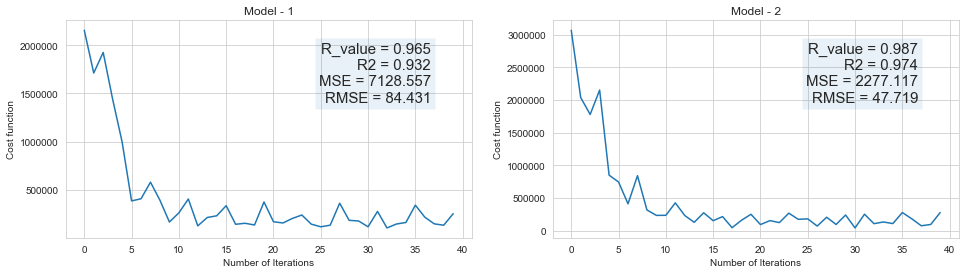

In [51]:
# Check that the mini-batch gradient descent works
# Plot Cost function vs. number of iterations
plt.figure(figsize=(16,4))

ax = plt.subplot(1,2,1)
plt.plot(np.arange(len(costHist)),costHist)
plt.title('Model - 1')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.text(0.9, 0.9, 'R_value = {:.3f}\nR2 = {:.3f}\nMSE = {:.3f}\nRMSE = {:.3f}'.format(R_value, R2, MSE, RMSE),
         fontsize=15, horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.1), transform=ax.transAxes)

ax = plt.subplot(1,2,2)
plt.plot(np.arange(len(costHist_vol)),costHist_vol)
plt.title('Model - 2')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')
plt.text(0.9, 0.9, 'R_value = {:.3f}\nR2 = {:.3f}\nMSE = {:.3f}\nRMSE = {:.3f}'.format(R_value_vol, R2_vol, MSE_vol, RMSE_vol),
         fontsize=15, horizontalalignment='right', verticalalignment='top', bbox=dict(alpha=0.1), transform=ax.transAxes)
plt.show()

### Modelling using SKLearn

In [52]:
# Import relevant sklearn libs
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler

In [53]:
# Take the features for modelling
coll = coll_orig.copy()
X = coll.loc[:, ['Length', 'Width', 'Height']]
X1 = coll.loc[:,['Volume']]
y = coll['Cost']

# Normalize the data
X = StandardScaler(copy=False).fit(X).transform(X)
X1 = StandardScaler(copy=False).fit(X1).transform(X1)

In [54]:
# Model with 3 features - Length, Width and Height using OLS
# Split to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=3128)

# Model can also be SGDRegressor, results are nearly the same
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
RSquared = r2_score(y_test, y_pred)
MSE = mean_squared_error(y_test, y_pred)

print('Coefficient = ', model.coef_.ravel())
print('Intercept = ', model.intercept_)
print('R_value (R) = %.3f' % np.sqrt(RSquared))
print('Variance score (R2) = %.3f' % RSquared)
print('Mean squared error (MSE) = %.3f' % MSE)
print('Root Mean Squared Error (RMSE) = %.3f' % np.sqrt(MSE))

Coefficient =  [232.62699827  92.46307134  15.67699078]
Intercept =  396.6964301866949
R_value (R) = 0.973
Variance score (R2) = 0.946
Mean squared error (MSE) = 7181.728
Root Mean Squared Error (RMSE) = 84.745


In [55]:
# Model with one feature - Volume using SGD
# Split to train and test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, train_size=0.8, test_size=0.2, random_state=2642)

# Model can also be LinearRegression, results are nearly the same
model = SGDRegressor()
model.fit(X1_train, y1_train)
y1_pred = model.predict(X1_test)
RSquared = r2_score(y1_test, y1_pred)
MSE = mean_squared_error(y1_test, y1_pred)

print('Coefficient = ', model.coef_.ravel())
print('Intercept = ', model.intercept_)
print('R_value (R) = %.3f' % np.sqrt(RSquared))
print('Variance score (R2) = %.3f' % RSquared)
print('Mean squared error (MSE) = %.3f' % MSE)
print('Root Mean Squared Error (RMSE) = %.3f' % np.sqrt(MSE))

Coefficient =  [330.31066969]
Intercept =  [400.25239293]
R_value (R) = 0.991
Variance score (R2) = 0.982
Mean squared error (MSE) = 1523.585
Root Mean Squared Error (RMSE) = 39.033


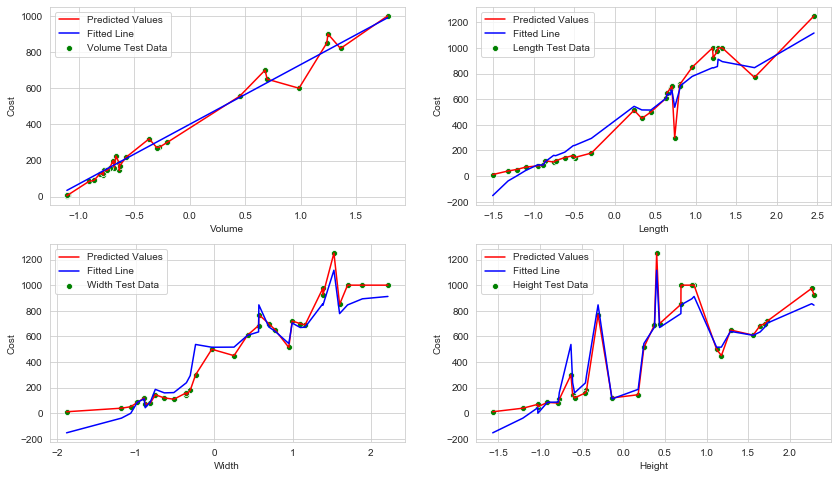

In [56]:
# Visualize the regression lines
plt.figure(figsize=(14,8))

# Volume will be a straight line univariate fit
plt.subplot(221)
volume = X1_test.ravel()
sb.scatterplot(volume, y1_test, color='g', label='Volume Test Data')
sb.lineplot(volume, y1_test, color='r', label='Predicted Values')
sb.lineplot(volume, y1_pred, color='b', label='Fitted Line')
plt.xlabel('Volume')

# Length with a multi-variate fit
plt.subplot(222)
l = X_test[:,0].ravel()
sb.scatterplot(l, y_test, color='g', label='Length Test Data')
sb.lineplot(l, y_test, color='r', label='Predicted Values')
sb.lineplot(l, y_pred, color='b', label='Fitted Line')
plt.xlabel('Length')

# Height with a multi-variate fit
plt.subplot(223)
w = X_test[:,1].ravel()
sb.scatterplot(w, y_test, color='g', label='Width Test Data')
sb.lineplot(w, y_test, color='r', label='Predicted Values')
sb.lineplot(w, y_pred, color='b', label='Fitted Line')
plt.xlabel('Width')

# Width with a multi-variate fit
plt.subplot(224)
h = X_test[:,2].ravel()
sb.scatterplot(h, y_test, color='g', label='Height Test Data')
sb.lineplot(h, y_test, color='r', label='Predicted Values')
sb.lineplot(h, y_pred, color='b', label='Fitted Line')
plt.xlabel('Height')

plt.show()

## Summary

Having built models with multiple features including the dimensions of the Luggage Bags (LxWxH), and also with a single new feature created as "Volume", it was indicated that the best fit was obtained by combining the dimensions and obtaining the new Volume feature. "Volume" is equiuvalent to the dimensions of the Luggage Bags and technically the product of the attributes - "Length", "Width" and "Height". The problem can also be reduced to a polynomial regression with the cubic interaction term ONLY, which is again the same as Volume.

Not only is the performance and variance score lesser using the created "Volume" feature, the model is also very simple in terms of computation, inference and explicability.

Thus, the feature "Volume" can be finalized to deploy a model targetted towards setting/predicting the "Cost" for future new variants of similar kinds of Luggage Bags for the company owing to the attribute's simpicity and interpretability.

Business explanation - Cost of the luggage bags is a linear function of the Volume of the bags. For every unit increase in Volume (Volume units are mean scaled), the Cost should be increased by around 300 cost units.